# Data Catalogue Analysis – IDC API Vs TCIA API

This notebook includes:

- Comparing the available collections on the IDC API vs. TCIA API


In [1]:
# Import libraries
from tcia_utils import nbia
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
import requests
import json
import pandas as pd

In [4]:
# load IDC data dictionary
df_idc_api = pd.read_pickle("data_catalogue_idc_api.pkl")
df_idc_api = df_idc_api.rename(columns={'collection_id': 'Collection'})
df_idc_api['Collection'] = df_idc_api['Collection'].str.lower().str.replace("-", "_")

# Have a peek at the data
print(len(df_idc_api)) #length of the dataframe
print(df_idc_api.columns) # column names
print(df_idc_api.head()) #view first 4 rows of the dataframe

299212
Index(['BodyPartExamined', 'CancerType', 'Modality', 'PatientID',
       'SeriesInstanceUID', 'StudyInstanceUID', 'Collection'],
      dtype='object')
  BodyPartExamined                  CancerType Modality    PatientID  \
0             LUNG  Non-small Cell Lung Cancer       CT  111_HM10395   
1             LUNG  Non-small Cell Lung Cancer       CT  118_HM10395   
2             LUNG  Non-small Cell Lung Cancer       CT  111_HM10395   
3             LUNG  Non-small Cell Lung Cancer       CT  103_HM10395   
4             LUNG  Non-small Cell Lung Cancer       CT  107_HM10395   

                                   SeriesInstanceUID  \
0  1.3.6.1.4.1.14519.5.2.1.6834.5010.100037757822...   
1  1.3.6.1.4.1.14519.5.2.1.6834.5010.100049789635...   
2  1.3.6.1.4.1.14519.5.2.1.6834.5010.100055011459...   
3  1.3.6.1.4.1.14519.5.2.1.6834.5010.100089621274...   
4  1.3.6.1.4.1.14519.5.2.1.6834.5010.100137773791...   

                                    StudyInstanceUID Collection  
0  1.3

In [8]:
# load TCIA data dictionary
df_tcia_api = pd.read_pickle("data_catalogue_tcia_api.pkl")
df_tcia_api['Collection'] = df_tcia_api['Collection'].str.lower().str.replace("-", "_")

# Have a peek at the data
print(len(df_tcia_api)) #length of the dataframe
print(df_tcia_api.columns) # column names
print(df_tcia_api.head()) #view first 4 rows of the dataframe


332024
Index(['SeriesInstanceUID', 'StudyInstanceUID', 'Modality', 'SeriesDate',
       'SeriesDescription', 'BodyPartExamined', 'SeriesNumber', 'Collection',
       'Site', 'PatientID', 'PatientSex', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'SoftwareVersions', 'ImageCount',
       'MaxSubmissionTimestamp', 'LicenseName', 'LicenseURI',
       'DataDescriptionURI', 'FileSize', 'DateReleased', 'StudyDesc',
       'StudyDate', 'Authorized', 'ReleasedStatus', 'ThirdPartyAnalysis',
       'ProtocolName', 'AdmittingDiagnosisDescription', 'AnnotationsFlag'],
      dtype='object')
                                   SeriesInstanceUID  \
0  1.3.6.1.4.1.14519.5.2.1.7695.1700.130662782053...   
1  1.3.6.1.4.1.14519.5.2.1.7695.1700.210410189256...   
2  1.3.6.1.4.1.14519.5.2.1.7695.1700.300426672774...   
3  1.3.6.1.4.1.14519.5.2.1.7695.1700.121675024518...   
4  1.3.6.1.4.1.14519.5.2.1.7695.1700.228597508795...   

                                    StudyInstanceUID Modality 

# Comparing the available collections on the TCIA API vs. the IDC API

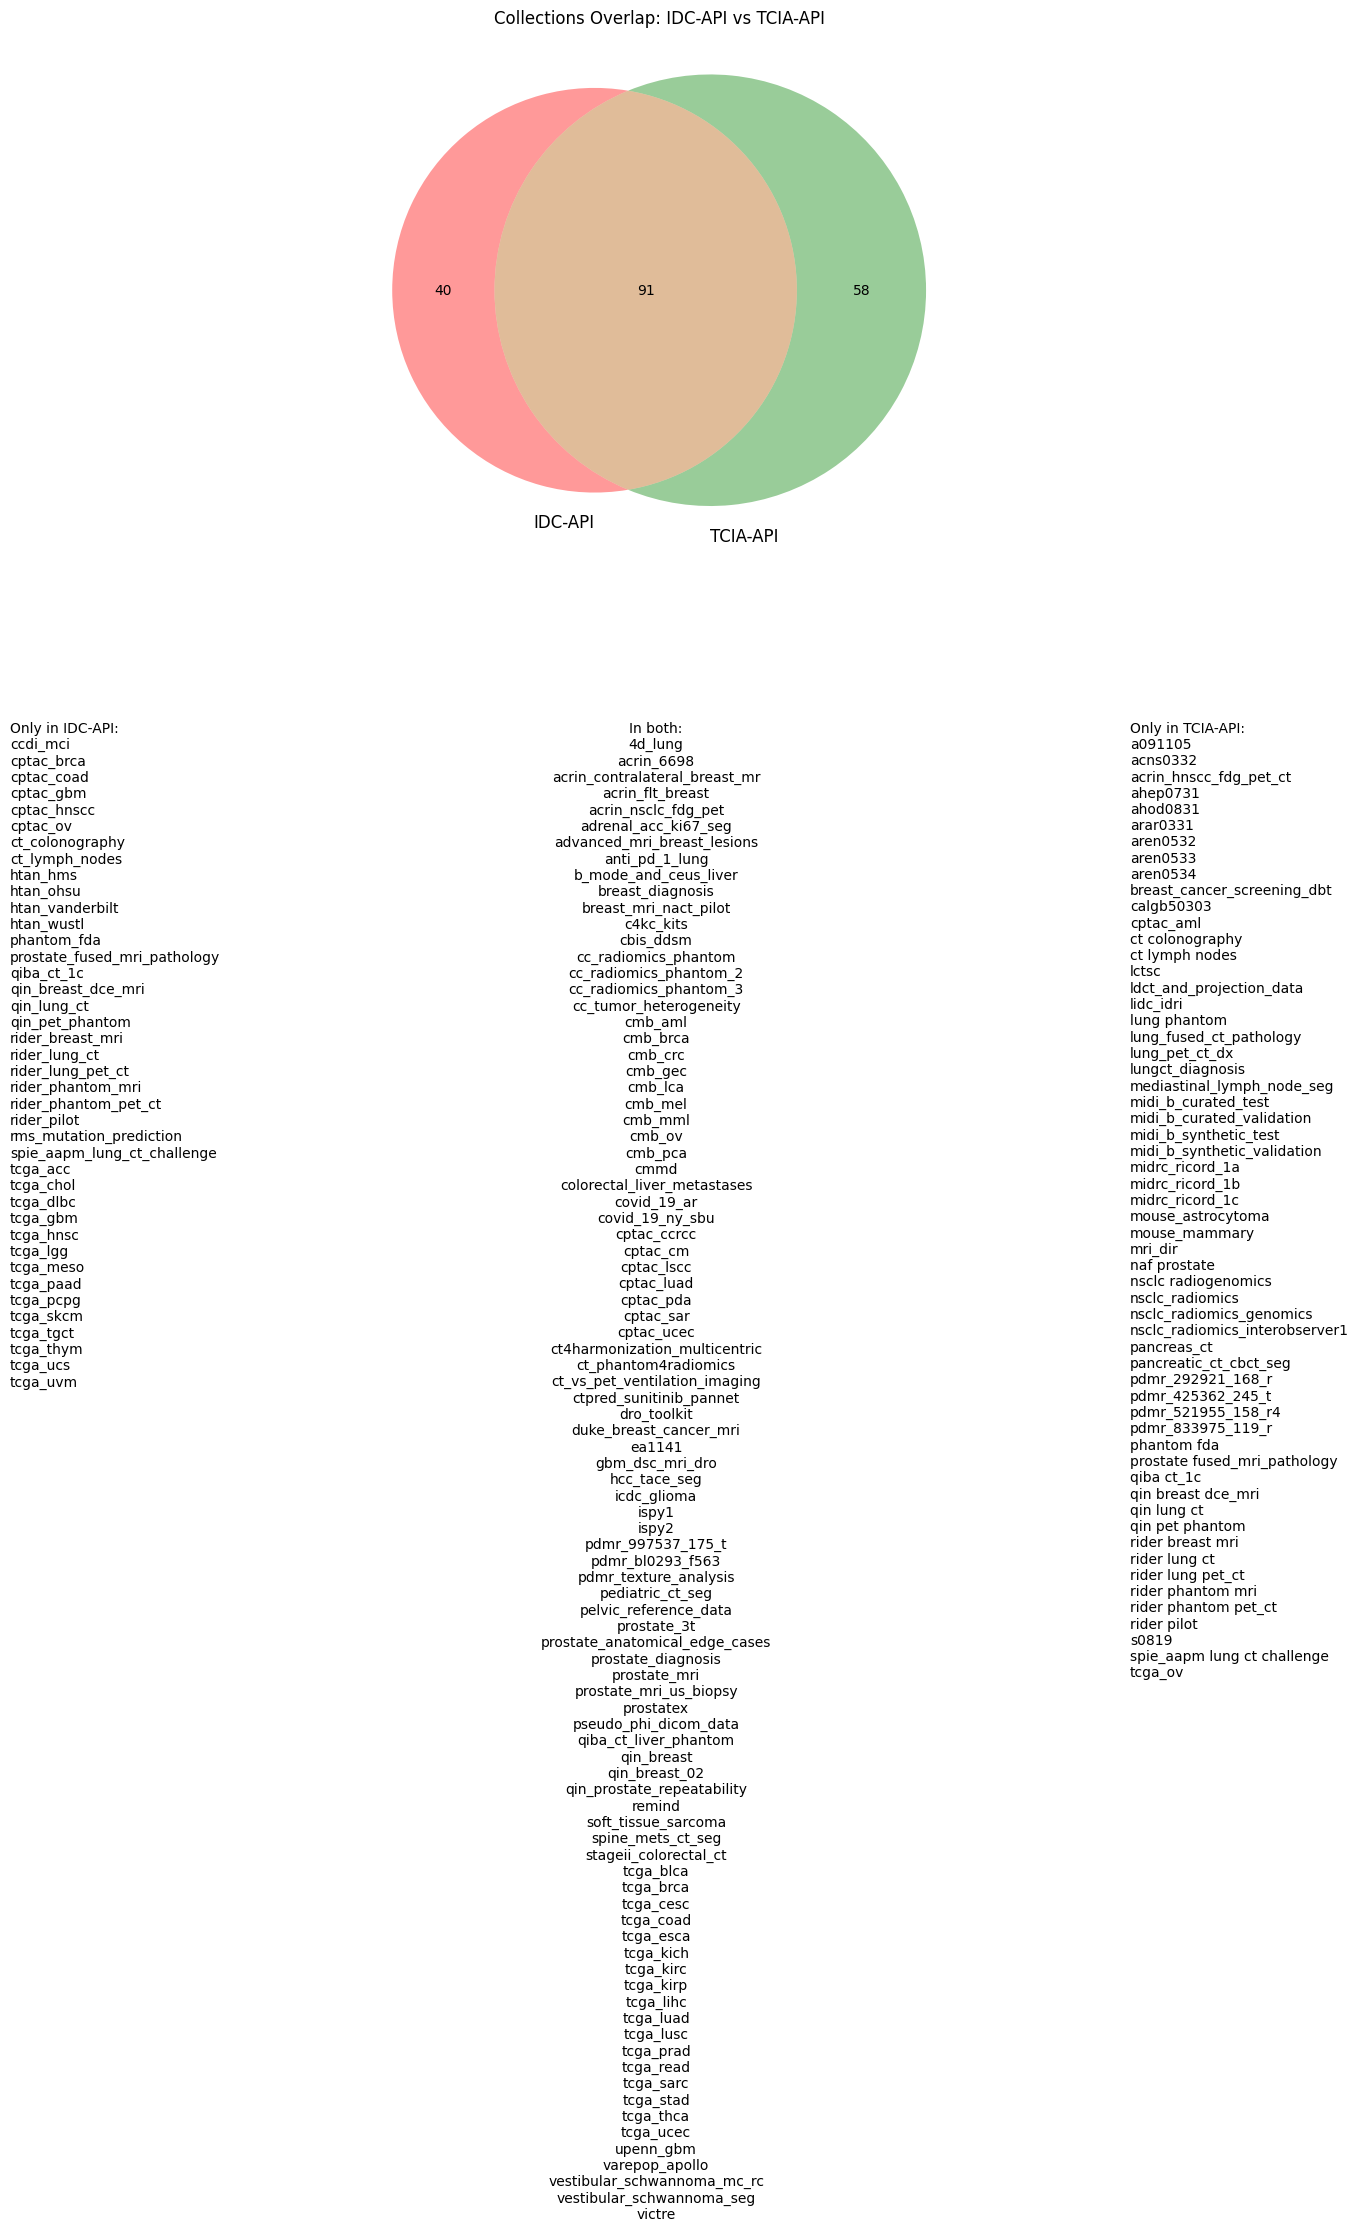

In [9]:
# Create Venn diagram to see which collections are there in the API and Website
u1 = set(df_idc_api['Collection'].unique())   # IDC-API
u2 = set(df_tcia_api['Collection'].unique())  # TCIA-API

plt.figure(figsize=(8,8))
venn2([u1, u2], set_labels=('IDC-API', 'TCIA-API'))
plt.title('Collections Overlap: IDC-API vs TCIA-API')
only_api = sorted(u1 - u2)
only_web = sorted(u2 - u1)
both = sorted(u1 & u2)
plt.text(-1.5, -1.0, "Only in IDC-API:\n" + "\n".join(only_api), fontsize=10, verticalalignment='top')
plt.text(1.1, -1.0, "Only in TCIA-API:\n" + "\n".join(only_web), fontsize=10, verticalalignment='top')
plt.text(0, -1.0, "In both:\n" + "\n".join(both), fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.axis('off')  # optional, hide axes
plt.show()

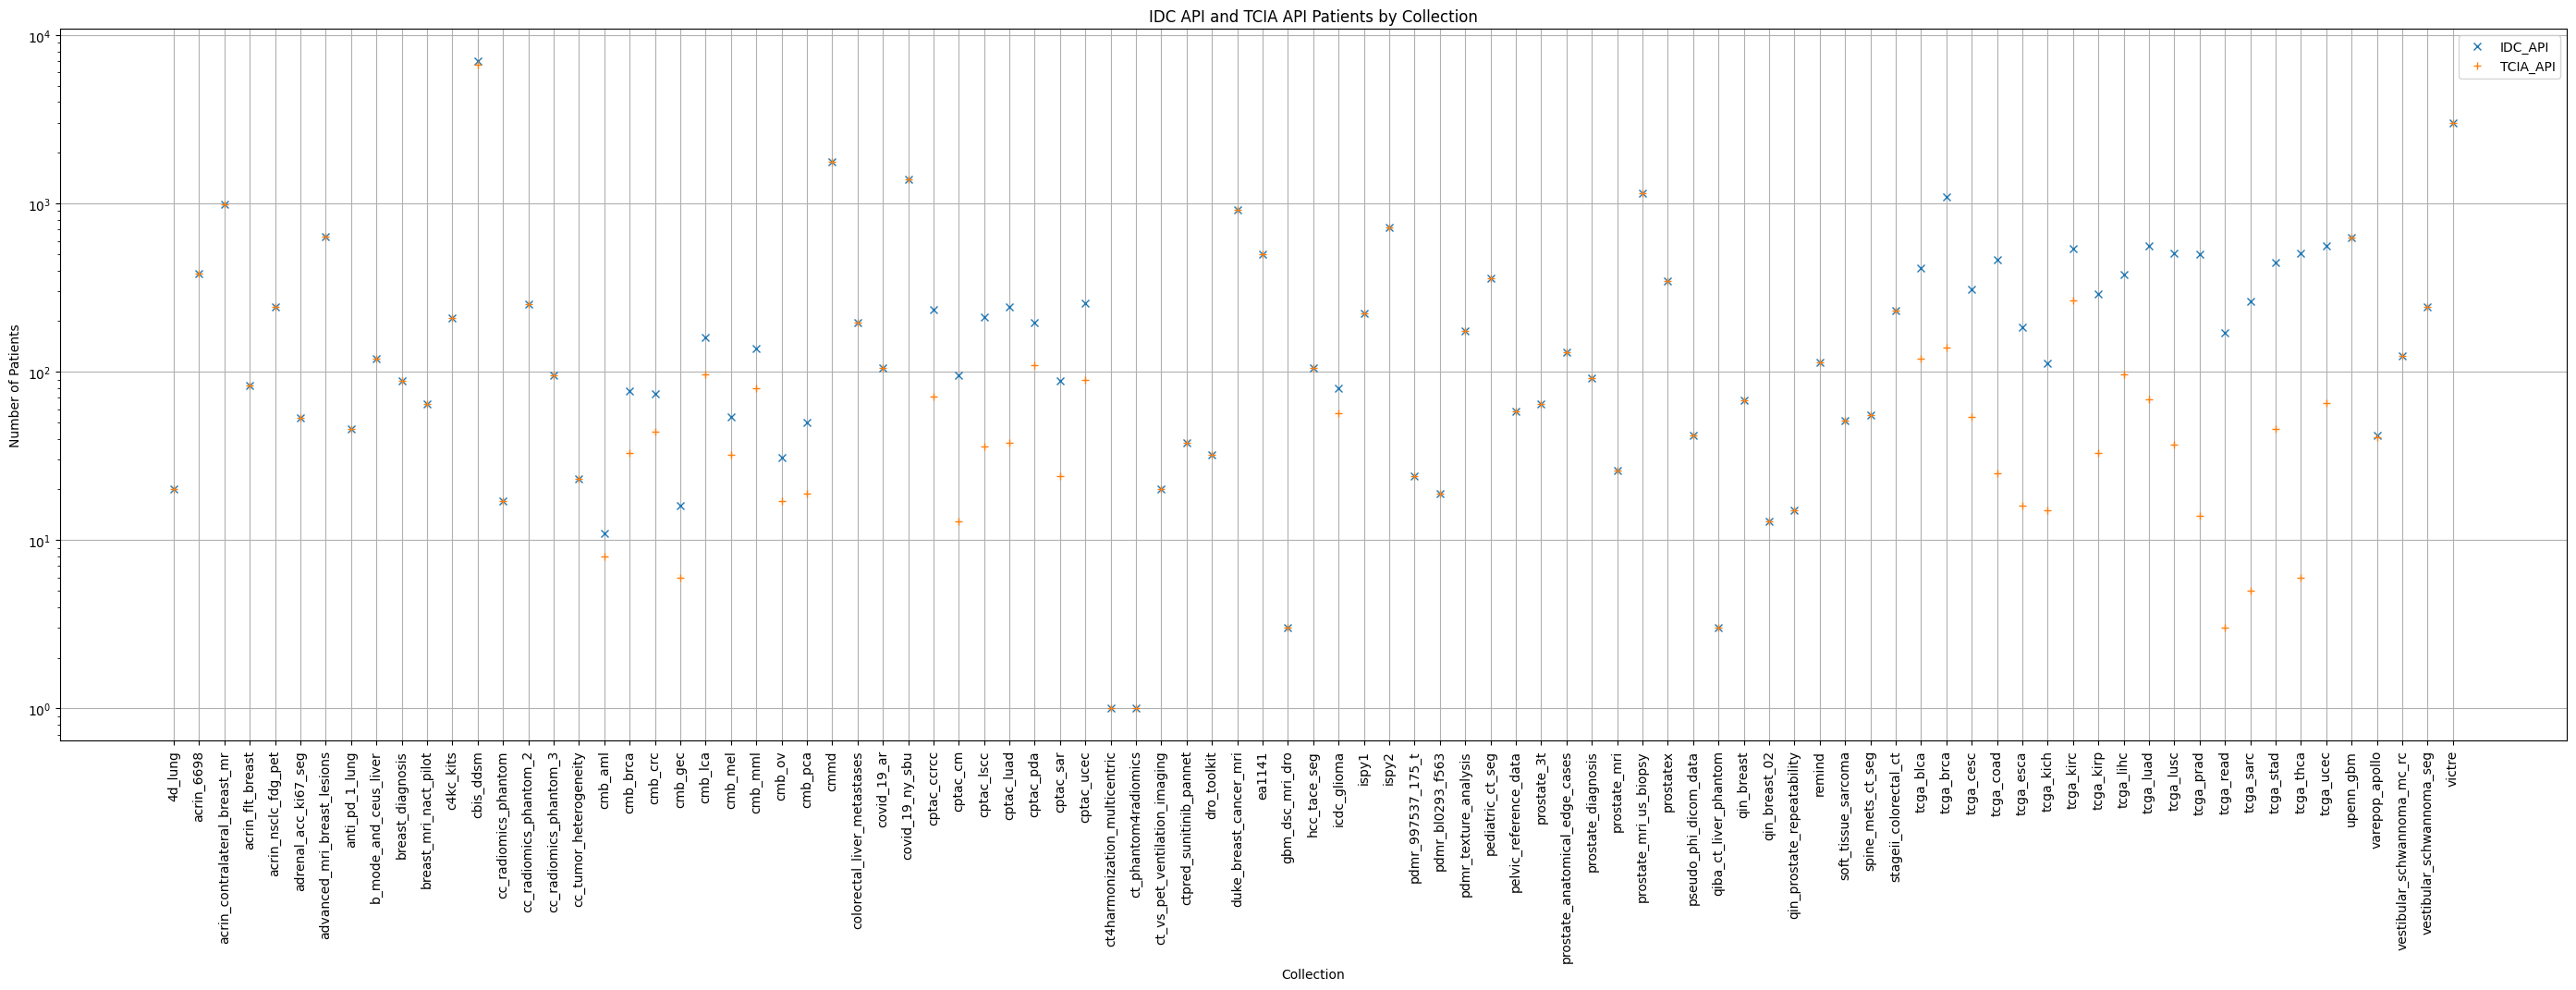

In [10]:
# Let's compare the metadata (unique patient numbers) from TCIA API and IDC API
master_collection_list = list(set(df_idc_api['Collection'].unique()) | set(df_tcia_api['Collection'].unique()))

count=0
compare = pd.DataFrame(columns=['Collection', 'API', 'Website'])
for collection in sorted(master_collection_list):

        filtered_df = df_idc_api[df_idc_api['Collection'] == collection]
        n = filtered_df['PatientID'].nunique()

        filtered_df = df_tcia_api[df_tcia_api['Collection'] == collection]
        m = filtered_df['PatientID'].nunique()

        if n==0 or m==0:
                continue
        
        compare = pd.concat([compare, pd.DataFrame({'Collection':[collection], 'IDC_API':[n], 'TCIA_API':[m]})], ignore_index=True)


plt.figure(figsize=(35,10))
plt.plot(compare['Collection'], compare['IDC_API'], marker='x', linestyle='', label='IDC_API')
plt.plot(compare['Collection'], compare['TCIA_API'], marker='+', linestyle='', label='TCIA_API')

plt.xlabel('Collection')
plt.ylabel('Number of Patients')
plt.yscale('log')  # <-- set log scale

plt.xticks(rotation=90)
plt.title('IDC API and TCIA API Patients by Collection')
plt.legend()
plt.grid(True)

# plt.savefig('api_website_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

Seems like the IDC API provides more info than the TCIA API